<a href="https://colab.research.google.com/github/Swayamprakashpatel/IR_Tablet/blob/main/IR_Tablet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Assuming you have the dataset in a CSV file named 'data.csv'
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.',], axis = 1)


In [ ]:
print(y1)

0      0.33
1      0.41
2      0.31
3      0.59
4      0.56
       ... 
859    0.51
860    0.22
861    0.02
862    0.07
863    0.44
Name: Unnamed: 15, Length: 864, dtype: float64


In [3]:


# Splitting the dataset into features (X) and targets (y)
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2] # Binder Type and Disintegrant type
X2 = X.iloc[:, 2:4].apply(pd.to_numeric, errors='coerce') / 10 # Disintegrant and binder amount
X3 = X.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce') / 100 # Mannitola and MCC amount
X4 = X.iloc[:, 6:7].apply(pd.to_numeric, errors='coerce') / 20 # Punch Size
X5 = X.iloc[:, 7:8].apply(pd.to_numeric, errors='coerce') / 10 # Compression Force
X6 = X.iloc[:,8:9].apply(pd.to_numeric, errors='coerce') / 1000 # Tablet Weight

y1 = df.iloc[:, 9:10].apply(pd.to_numeric, errors='coerce') / 20  # Output column 1 = Hardness(kg/cm2)
y2 = df.iloc[:, 10:11].apply(pd.to_numeric, errors='coerce') / 10  # Output column 2 = % Friability
y3 = df.iloc[:, 11:12].apply(pd.to_numeric, errors='coerce') / 1000  # Output column 3 = Disin. Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2,X3,X4,X5,X6], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X_encoded, y1, y2, y3, test_size=0.4, random_state=42)

# Linear Regression for y1
linear_reg_y1 = LinearRegression()
linear_reg_y1.fit(X_train, y1_train)
y1_pred_linear = linear_reg_y1.predict(X_test)
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)

# Linear Regression for y2
linear_reg_y2 = LinearRegression()
linear_reg_y2.fit(X_train, y2_train)
y2_pred_linear = linear_reg_y2.predict(X_test)
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)

# Linear Regression for y3
linear_reg_y3 = LinearRegression()
linear_reg_y3.fit(X_train, y3_train)
y3_pred_linear = linear_reg_y3.predict(X_test)
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)

# Support Vector Machine (SVM) for y1
svm_y1 = SVR()
svm_y1.fit(X_train, y1_train)
y1_pred_svm = svm_y1.predict(X_test)
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)

# Support Vector Machine (SVM) for y2
svm_y2 = SVR()
svm_y2.fit(X_train, y2_train)
y2_pred_svm = svm_y2.predict(X_test)
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)

# Support Vector Machine (SVM) for y3
svm_y3 = SVR()
svm_y3.fit(X_train, y3_train)
y3_pred_svm = svm_y3.predict(X_test)
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)

# k-Nearest Neighbors (k-NN) for y1
knn_y1 = KNeighborsRegressor()
knn_y1.fit(X_train, y1_train)
y1_pred_knn = knn_y1.predict(X_test)
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)

# k-Nearest Neighbors (k-NN) for y2
knn_y2 = KNeighborsRegressor()
knn_y2.fit(X_train, y2_train)
y2_pred_knn = knn_y2.predict(X_test)
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)

# k-Nearest Neighbors (k-NN) for y3
knn_y3 = KNeighborsRegressor()
knn_y3.fit(X_train, y3_train)
y3_pred_knn = knn_y3.predict(X_test)
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)

# Artificial Neural Network (ANN) for y1
from sklearn.metrics import r2_score

# Define custom R-squared metric
def r_squared(y_true, y_pred):
    return 1 - tf.reduce_sum(tf.square(y_true - y_pred)) / tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))

# Define custom R-squared loss function
def r_squared_loss(y_true, y_pred):
    return -r_squared(y_true, y_pred)

# Define custom callback to monitor validation R-squared and save the best model
class R2Callback(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, filepath, patience=10, delta=0.01):
        super(R2Callback, self).__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.filepath = filepath
        self.patience = patience
        self.delta = delta
        self.best_r2 = -float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        y_pred_val = self.model.predict(self.X_val)
        r2_val = r2_score(self.y_val, y_pred_val)
        print(f'Validation R^2: {r2_val}')
        if r2_val - self.best_r2 > self.delta:
            self.best_r2 = r2_val
            self.wait = 0
            self.model.save(self.filepath, overwrite=True)
            print("Model saved with validation R^2:", r2_val)
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Early stopping due to no improvement in validation R^2.")

# Define file paths to save the best models for y1, y2, and y3
filepath_y1 = '/content/drive/My Drive/y1.hdf5'
filepath_y2 = '/content/drive/My Drive/y2.hdf5'
filepath_y3 = '/content/drive/My Drive/y3.hdf5'

# Define custom callback to monitor validation R-squared for y1, y2, and y3
r2_callback_y1 = R2Callback(X_test, y1_test, filepath_y1, patience=369, delta=0.01)
r2_callback_y2 = R2Callback(X_test, y2_test, filepath_y2, patience=369, delta=0.01)
r2_callback_y3 = R2Callback(X_test, y3_test, filepath_y3, patience=369, delta=0.01)

# Define and compile ANN model for y1
ann_y1 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y1.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y1 with the custom callback
hist_y1 = ann_y1.fit(X_train, y1_train, epochs=1000, callbacks=[r2_callback_y1], validation_data=(X_test, y1_test), batch_size=None)

# Load the best model for y1
ann_y1 = tf.keras.models.load_model(filepath_y1, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y1
y1_pred_ann = ann_y1.predict(X_test)

# Define and compile ANN model for y2
ann_y2 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y2.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y2 with the custom callback
hist_y2 = ann_y2.fit(X_train, y2_train, epochs=1000, callbacks=[r2_callback_y2], validation_data=(X_test, y2_test), batch_size=None)

# Load the best model for y2
ann_y2 = tf.keras.models.load_model(filepath_y2, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y2
y2_pred_ann = ann_y2.predict(X_test)

# Define and compile ANN model for y3
ann_y3 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y3.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y3 with the custom callback
hist_y3 = ann_y3.fit(X_train, y3_train, epochs=1000, callbacks=[r2_callback_y3], validation_data=(X_test, y3_test), batch_size=None)

# Load the best model for y3
ann_y3 = tf.keras.models.load_model(filepath_y3, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y3
y3_pred_ann = ann_y3.predict(X_test)


from google.colab import files

# Replace 'file_path' with the path to the file you want to download
files.download('/content/drive/My Drive/y1.hdf5')
files.download('/content/drive/My Drive/y2.hdf5')
files.download('/content/drive/My Drive/y3.hdf5')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

Epoch 1/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.052080415973319694
Model saved with validation R^2: 0.052080415973319694
17/17 [==============================] - 3s 83ms/step - loss: 0.7988 - r_squared: -0.8296 - val_loss: 0.0194 - val_r_squared: -0.0187
Epoch 2/1000
 5/17 [=======>......................] - ETA: 0s - loss: -0.1538 - r_squared: 0.1538

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.2181667040273011
Model saved with validation R^2: 0.2181667040273011
17/17 [==============================] - 1s 34ms/step - loss: -0.1067 - r_squared: 0.1042 - val_loss: -0.1678 - val_r_squared: 0.1692
Epoch 3/1000
10/17 [================>.............] - ETA: 0s - loss: -0.1654 - r_squared: 0.1654

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.29546407384335405
Model saved with validation R^2: 0.29546407384335405
17/17 [==============================] - 1s 41ms/step - loss: -0.1863 - r_squared: 0.1899 - val_loss: -0.2608 - val_r_squared: 0.2634
Epoch 4/1000
10/17 [================>.............] - ETA: 0s - loss: -0.2736 - r_squared: 0.2736

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.222105403929309
17/17 [==============================] - 1s 48ms/step - loss: -0.2682 - r_squared: 0.2597 - val_loss: -0.1641 - val_r_squared: 0.1675
Epoch 5/1000
11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.23245873408510975
17/17 [==============================] - 1s 52ms/step - loss: -0.2768 - r_squared: 0.2634 - val_loss: -0.2022 - val_r_squared: 0.2050
Epoch 6/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.38346450677498967
Model saved with validation R^2: 0.38346450677498967
17/17 [==============================] - 1s 66ms/step - loss: -0.3622 - r_squared: 0.3698 - val_loss: -0.3465 - val_r_squared: 0.3498
Epoch 7/1000
 8/17 [=============>................] - ETA: 0s - loss: -0.3670 - r_squared: 0.3670

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.05409546387895492
17/17 [==============================] - 1s 48ms/step - loss: -0.4008 - r_squared: 0.3866 - val_loss: 0.0198 - val_r_squared: -0.0150
Epoch 8/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.39936046707306405
Model saved with validation R^2: 0.39936046707306405
17/17 [==============================] - 1s 43ms/step - loss: -0.4376 - r_squared: 0.4486 - val_loss: -0.3790 - val_r_squared: 0.3820
Epoch 9/1000
 5/17 [=======>......................] - ETA: 0s - loss: -0.3991 - r_squared: 0.3991

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.5291828786934958
Model saved with validation R^2: 0.5291828786934958
17/17 [==============================] - 1s 52ms/step - loss: -0.4706 - r_squared: 0.4687 - val_loss: -0.5060 - val_r_squared: 0.5098
Epoch 10/1000
 5/17 [=======>......................] - ETA: 0s - loss: -0.4698 - r_squared: 0.4698

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.49231676081599074
17/17 [==============================] - 1s 57ms/step - loss: -0.5299 - r_squared: 0.5399 - val_loss: -0.4752 - val_r_squared: 0.4785
Epoch 11/1000
11/11 [==============================] - 0s 8ms/step
Validation R^2: 0.47018026589597595
17/17 [==============================] - 1s 61ms/step - loss: -0.5029 - r_squared: 0.4965 - val_loss: -0.4309 - val_r_squared: 0.4348
Epoch 12/1000
11/11 [==============================] - 0s 9ms/step
Validation R^2: 0.48533148466198106
17/17 [==============================] - 1s 58ms/step - loss: -0.5303 - r_squared: 0.5369 - val_loss: -0.4682 - val_r_squared: 0.4709
Epoch 13/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.6145174197899088
Model saved with validation R^2: 0.6145174197899088
17/17 [==============================] - 1s 65ms/step - loss: -0.5503 - r_squared: 0.5587 - val_loss: -0.5976 - val_r_squared: 0.6011
Epoch 14/1000
 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.0952300322942835
17/17 [==============================] - 1s 58ms/step - loss: -0.5908 - r_squared: 0.5938 - val_loss: -0.0569 - val_r_squared: 0.0591
Epoch 15/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.5565178866738512
17/17 [==============================] - 1s 45ms/step - loss: -0.5533 - r_squared: 0.5654 - val_loss: -0.5418 - val_r_squared: 0.5448
Epoch 16/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5498329986614285
17/17 [==============================] - 1s 34ms/step - loss: -0.6105 - r_squared: 0.6251 - val_loss: -0.5146 - val_r_squared: 0.5187
Epoch 17/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.6374548470323549
Model saved with validation R^2: 0.6374548470323549
17/17 [==============================] - 1s 45ms/step - loss: -0.6290 - r_squared: 0.6361 - val_loss: -0.6153 - val_r_squared: 0.6191
Epoch 18/1000
 9/1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5479567135294359
17/17 [==============================] - 1s 34ms/step - loss: -0.6385 - r_squared: 0.5974 - val_loss: -0.5061 - val_r_squared: 0.5101
Epoch 19/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.670847874649718
Model saved with validation R^2: 0.670847874649718
17/17 [==============================] - 1s 34ms/step - loss: -0.6424 - r_squared: 0.6542 - val_loss: -0.6551 - val_r_squared: 0.6582
Epoch 20/1000
11/17 [==================>...........] - ETA: 0s - loss: -0.6395 - r_squared: 0.6395

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: -0.4024298751561024
17/17 [==============================] - 1s 35ms/step - loss: -0.5931 - r_squared: 0.5898 - val_loss: 0.4711 - val_r_squared: -0.4688
Epoch 21/1000
11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.6710111249561503
17/17 [==============================] - 1s 47ms/step - loss: -0.6120 - r_squared: 0.6267 - val_loss: -0.6497 - val_r_squared: 0.6529
Epoch 22/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.5488242556658762
17/17 [==============================] - 1s 51ms/step - loss: -0.6579 - r_squared: 0.6663 - val_loss: -0.5103 - val_r_squared: 0.5148
Epoch 23/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6801745755348345
17/17 [==============================] - 1s 57ms/step - loss: -0.6679 - r_squared: 0.6752 - val_loss: -0.6550 - val_r_squared: 0.6584
Epoch 24/1000
11/11 [==============================] - 0s 3ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6867846571703481
17/17 [==============================] - 1s 38ms/step - loss: -0.7267 - r_squared: 0.7355 - val_loss: -0.6719 - val_r_squared: 0.6746
Epoch 29/1000
11/11 [==============================] - 0s 9ms/step
Validation R^2: 0.7033915245883491
Model saved with validation R^2: 0.7033915245883491
17/17 [==============================] - 1s 74ms/step - loss: -0.7211 - r_squared: 0.7229 - val_loss: -0.6848 - val_r_squared: 0.6879
Epoch 30/1000
 1/17 [>.............................] - ETA: 0s - loss: -0.7518 - r_squared: 0.7518

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 11ms/step
Validation R^2: 0.7163176955049368
Model saved with validation R^2: 0.7163176955049368
17/17 [==============================] - 1s 86ms/step - loss: -0.7126 - r_squared: 0.7118 - val_loss: -0.6976 - val_r_squared: 0.7006
Epoch 31/1000
 3/17 [====>.........................] - ETA: 0s - loss: -0.6719 - r_squared: 0.6719

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.6144358464221301
17/17 [==============================] - 1s 57ms/step - loss: -0.7023 - r_squared: 0.7098 - val_loss: -0.5976 - val_r_squared: 0.6003
Epoch 32/1000
11/11 [==============================] - 0s 8ms/step
Validation R^2: 0.6250258060000059
17/17 [==============================] - 1s 70ms/step - loss: -0.7077 - r_squared: 0.7131 - val_loss: -0.5920 - val_r_squared: 0.5954
Epoch 33/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7188815205025085
17/17 [==============================] - 1s 31ms/step - loss: -0.7120 - r_squared: 0.7151 - val_loss: -0.7011 - val_r_squared: 0.7038
Epoch 34/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.41819859625045275
17/17 [==============================] - 1s 40ms/step - loss: -0.7175 - r_squared: 0.7169 - val_loss: -0.3619 - val_r_squared: 0.3669
Epoch 35/1000
11/11 [==============================] - 0s 4ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7491633552344887
Model saved with validation R^2: 0.7491633552344887
17/17 [==============================] - 1s 39ms/step - loss: -0.7871 - r_squared: 0.7870 - val_loss: -0.7336 - val_r_squared: 0.7360
Epoch 44/1000
 6/17 [=========>....................] - ETA: 0s - loss: -0.8312 - r_squared: 0.8312

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.7547396631463681
17/17 [==============================] - 1s 37ms/step - loss: -0.7871 - r_squared: 0.7897 - val_loss: -0.7386 - val_r_squared: 0.7410
Epoch 45/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7148596258444944
17/17 [==============================] - 0s 28ms/step - loss: -0.7959 - r_squared: 0.7990 - val_loss: -0.7013 - val_r_squared: 0.7035
Epoch 46/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7562176794933041
17/17 [==============================] - 0s 18ms/step - loss: -0.7915 - r_squared: 0.7899 - val_loss: -0.7421 - val_r_squared: 0.7443
Epoch 47/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6115480617433373
17/17 [==============================] - 0s 17ms/step - loss: -0.7974 - r_squared: 0.8023 - val_loss: -0.5965 - val_r_squared: 0.5983
Epoch 48/1000
11/11 [==============================] - 0s 2ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4203618746068025
17/17 [==============================] - 0s 25ms/step - loss: -0.7818 - r_squared: 0.7765 - val_loss: -0.3981 - val_r_squared: 0.3999
Epoch 56/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6574563282557431
17/17 [==============================] - 0s 27ms/step - loss: -0.7394 - r_squared: 0.7356 - val_loss: -0.6261 - val_r_squared: 0.6287
Epoch 57/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7669706012747071
17/17 [==============================] - 0s 27ms/step - loss: -0.7982 - r_squared: 0.7804 - val_loss: -0.7559 - val_r_squared: 0.7578
Epoch 58/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7069998607410608
17/17 [==============================] - 0s 29ms/step - loss: -0.8149 - r_squared: 0.8137 - val_loss: -0.6803 - val_r_squared: 0.6826
Epoch 59/1000
11/11 [==============================] - 0s 5ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7002096768070358
17/17 [==============================] - 0s 18ms/step - loss: -0.8298 - r_squared: 0.8181 - val_loss: -0.6756 - val_r_squared: 0.6777
Epoch 68/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4434517596242362
17/17 [==============================] - 0s 16ms/step - loss: -0.8077 - r_squared: 0.7955 - val_loss: -0.4222 - val_r_squared: 0.4240
Epoch 69/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.699905908021009
17/17 [==============================] - 0s 21ms/step - loss: -0.7861 - r_squared: 0.7862 - val_loss: -0.6751 - val_r_squared: 0.6771
Epoch 70/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6618581114251182
17/17 [==============================] - 0s 21ms/step - loss: -0.8384 - r_squared: 0.8347 - val_loss: -0.6344 - val_r_squared: 0.6366
Epoch 71/1000
11/11 [==============================] - 0s 2ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7954671443634306
17/17 [==============================] - 0s 17ms/step - loss: -0.8401 - r_squared: 0.8433 - val_loss: -0.7837 - val_r_squared: 0.7854
Epoch 73/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7914304406834372
17/17 [==============================] - 0s 17ms/step - loss: -0.8489 - r_squared: 0.8486 - val_loss: -0.7779 - val_r_squared: 0.7798
Epoch 74/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2655446472784623
17/17 [==============================] - 0s 21ms/step - loss: -0.8267 - r_squared: 0.8194 - val_loss: -0.1975 - val_r_squared: 0.1999
Epoch 75/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6762387511433118
17/17 [==============================] - 0s 16ms/step - loss: -0.8098 - r_squared: 0.8151 - val_loss: -0.6652 - val_r_squared: 0.6668
Epoch 76/1000
11/11 [==============================] - 0s 2ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7265444693201517
17/17 [==============================] - 0s 26ms/step - loss: -0.8282 - r_squared: 0.8353 - val_loss: -0.7173 - val_r_squared: 0.7188
Epoch 95/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.7622698759089542
17/17 [==============================] - 0s 29ms/step - loss: -0.8694 - r_squared: 0.8637 - val_loss: -0.7541 - val_r_squared: 0.7554
Epoch 96/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6377625862625251
17/17 [==============================] - 0s 27ms/step - loss: -0.8345 - r_squared: 0.8297 - val_loss: -0.6081 - val_r_squared: 0.6099
Epoch 97/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.8021076430927023
17/17 [==============================] - 1s 35ms/step - loss: -0.8533 - r_squared: 0.8445 - val_loss: -0.7947 - val_r_squared: 0.7960
Epoch 98/1000
11/11 [==============================] - 0s 2ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6937018129849039
17/17 [==============================] - 0s 18ms/step - loss: -0.8563 - r_squared: 0.8545 - val_loss: -0.6819 - val_r_squared: 0.6836
Epoch 106/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7808627363945495
17/17 [==============================] - 0s 18ms/step - loss: -0.8550 - r_squared: 0.8569 - val_loss: -0.7640 - val_r_squared: 0.7653
Epoch 107/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7619223882218347
17/17 [==============================] - 0s 22ms/step - loss: -0.8754 - r_squared: 0.8733 - val_loss: -0.7426 - val_r_squared: 0.7438
Epoch 108/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6752643132913665
17/17 [==============================] - 0s 18ms/step - loss: -0.8967 - r_squared: 0.8974 - val_loss: -0.6625 - val_r_squared: 0.6640
Epoch 109/1000
11/11 [==============================] - 0s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7737384235183475
17/17 [==============================] - 0s 20ms/step - loss: -0.9069 - r_squared: 0.9071 - val_loss: -0.7561 - val_r_squared: 0.7571
Epoch 119/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.6893907454980751
17/17 [==============================] - 1s 35ms/step - loss: -0.8566 - r_squared: 0.8580 - val_loss: -0.6777 - val_r_squared: 0.6796
Epoch 120/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7238140225607617
17/17 [==============================] - 1s 41ms/step - loss: -0.8628 - r_squared: 0.8659 - val_loss: -0.7134 - val_r_squared: 0.7152
Epoch 121/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.8368164249184175
17/17 [==============================] - 1s 45ms/step - loss: -0.8872 - r_squared: 0.8911 - val_loss: -0.8278 - val_r_squared: 0.8289
Epoch 122/1000
11/11 [==============================] - 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.42283455183875873
17/17 [==============================] - 0s 16ms/step - loss: -0.9258 - r_squared: 0.9201 - val_loss: -0.3735 - val_r_squared: 0.3758
Epoch 153/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5629847344993326
17/17 [==============================] - 0s 17ms/step - loss: -0.8957 - r_squared: 0.8830 - val_loss: -0.5437 - val_r_squared: 0.5458
Epoch 154/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.8405981801092736
17/17 [==============================] - 1s 34ms/step - loss: -0.9179 - r_squared: 0.9176 - val_loss: -0.8343 - val_r_squared: 0.8354
Epoch 155/1000
11/11 [==============================] - 0s 8ms/step
Validation R^2: 0.7816099123175904
17/17 [==============================] - 1s 52ms/step - loss: -0.9311 - r_squared: 0.9309 - val_loss: -0.7751 - val_r_squared: 0.7763
Epoch 156/1000
11/11 [==============================] - 0s 4ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5714988969443198
17/17 [==============================] - 0s 17ms/step - loss: -0.9393 - r_squared: 0.9268 - val_loss: -0.5335 - val_r_squared: 0.5341
Epoch 185/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5929321465303687
17/17 [==============================] - 0s 21ms/step - loss: -0.9060 - r_squared: 0.9028 - val_loss: -0.5718 - val_r_squared: 0.5741
Epoch 186/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8269635591636922
17/17 [==============================] - 0s 19ms/step - loss: -0.9188 - r_squared: 0.9186 - val_loss: -0.8214 - val_r_squared: 0.8224
Epoch 187/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4871749532418047
17/17 [==============================] - 0s 19ms/step - loss: -0.9266 - r_squared: 0.9167 - val_loss: -0.4602 - val_r_squared: 0.4618
Epoch 188/1000
11/11 [==============================] - 0s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: -0.23574395023848838
17/17 [==============================] - 0s 29ms/step - loss: -0.9193 - r_squared: 0.8614 - val_loss: 0.3420 - val_r_squared: -0.3397
Epoch 236/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8730577971206542
17/17 [==============================] - 1s 35ms/step - loss: -0.8786 - r_squared: 0.8826 - val_loss: -0.8661 - val_r_squared: 0.8669
Epoch 237/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.8713921350268896
17/17 [==============================] - 0s 20ms/step - loss: -0.9639 - r_squared: 0.9654 - val_loss: -0.8630 - val_r_squared: 0.8638
Epoch 238/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8734450742158729
17/17 [==============================] - 0s 17ms/step - loss: -0.9665 - r_squared: 0.9666 - val_loss: -0.8660 - val_r_squared: 0.8668
Epoch 239/1000
11/11 [==============================] - 0s 3ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.8519108470356358
17/17 [==============================] - 0s 19ms/step - loss: -0.9782 - r_squared: 0.9787 - val_loss: -0.8444 - val_r_squared: 0.8456
Epoch 350/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.8808722994995376
17/17 [==============================] - 0s 18ms/step - loss: -0.9790 - r_squared: 0.9793 - val_loss: -0.8720 - val_r_squared: 0.8727
Epoch 351/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.8805872493231475
17/17 [==============================] - 0s 19ms/step - loss: -0.9717 - r_squared: 0.9725 - val_loss: -0.8717 - val_r_squared: 0.8724
Epoch 352/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7688688496032428
17/17 [==============================] - 0s 18ms/step - loss: -0.9765 - r_squared: 0.9726 - val_loss: -0.7571 - val_r_squared: 0.7588
Epoch 353/1000
11/11 [==============================] - 0s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.9648238340463027
17/17 [==============================] - 0s 18ms/step - loss: -0.0640 - r_squared: 0.0036 - val_loss: 1.2048 - val_r_squared: -1.2112
Epoch 3/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.23552018048247414
Model saved with validation R^2: 0.23552018048247414
17/17 [==============================] - 0s 21ms/step - loss: -0.0269 - r_squared: 0.0403 - val_loss: -0.2436 - val_r_squared: 0.2460
Epoch 4/1000
15/17 [=========================>....] - ETA: 0s - loss: -0.2928 - r_squared: 0.2928

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.31148503743996026
Model saved with validation R^2: 0.31148503743996026
17/17 [==============================] - 0s 21ms/step - loss: -0.2938 - r_squared: 0.2906 - val_loss: -0.2874 - val_r_squared: 0.2890
Epoch 5/1000
17/17 [==============================] - ETA: 0s - loss: -0.3408 - r_squared: 0.2422

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.3161382979917793
17/17 [==============================] - 0s 18ms/step - loss: -0.3408 - r_squared: 0.2422 - val_loss: 0.4314 - val_r_squared: -0.4289
Epoch 6/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.34623703548255014
Model saved with validation R^2: 0.34623703548255014
17/17 [==============================] - 0s 19ms/step - loss: -0.2835 - r_squared: 0.3059 - val_loss: -0.3563 - val_r_squared: 0.3591
Epoch 7/1000
10/17 [================>.............] - ETA: 0s - loss: -0.3908 - r_squared: 0.3908

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3911942580498877
Model saved with validation R^2: 0.3911942580498877
17/17 [==============================] - 0s 20ms/step - loss: -0.4223 - r_squared: 0.4173 - val_loss: -0.3900 - val_r_squared: 0.3923
Epoch 8/1000
 9/17 [==============>...............] - ETA: 0s - loss: -0.4041 - r_squared: 0.4041

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.38524800117035285
17/17 [==============================] - 0s 18ms/step - loss: -0.3534 - r_squared: 0.3080 - val_loss: -0.3728 - val_r_squared: 0.3746
Epoch 9/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.39665025665433207
17/17 [==============================] - 0s 19ms/step - loss: -0.4188 - r_squared: 0.4321 - val_loss: -0.4035 - val_r_squared: 0.4061
Epoch 10/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4136435623721505
Model saved with validation R^2: 0.4136435623721505
17/17 [==============================] - 0s 23ms/step - loss: -0.4839 - r_squared: 0.5021 - val_loss: -0.4189 - val_r_squared: 0.4217
Epoch 11/1000
17/17 [==============================] - ETA: 0s - loss: -0.4758 - r_squared: 0.4816

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4335033162551186
Model saved with validation R^2: 0.4335033162551186
17/17 [==============================] - 0s 21ms/step - loss: -0.4758 - r_squared: 0.4816 - val_loss: -0.4359 - val_r_squared: 0.4384
Epoch 12/1000
 9/17 [==============>...............] - ETA: 0s - loss: -0.4831 - r_squared: 0.4831

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.20581844126188553
17/17 [==============================] - 0s 17ms/step - loss: -0.4664 - r_squared: 0.4214 - val_loss: -0.1698 - val_r_squared: 0.1728
Epoch 13/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4605719767294235
Model saved with validation R^2: 0.4605719767294235
17/17 [==============================] - 0s 17ms/step - loss: -0.4976 - r_squared: 0.5004 - val_loss: -0.4591 - val_r_squared: 0.4610
Epoch 14/1000
16/17 [===========================>..] - ETA: 0s - loss: -0.4930 - r_squared: 0.4930

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4766785676232871
Model saved with validation R^2: 0.4766785676232871
17/17 [==============================] - 0s 20ms/step - loss: -0.4921 - r_squared: 0.4886 - val_loss: -0.4722 - val_r_squared: 0.4741
Epoch 15/1000
10/17 [================>.............] - ETA: 0s - loss: -0.4497 - r_squared: 0.4497

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.33966396204029325
17/17 [==============================] - 0s 16ms/step - loss: -0.3721 - r_squared: 0.1529 - val_loss: -0.3454 - val_r_squared: 0.3491
Epoch 16/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.17800968918204507
17/17 [==============================] - 0s 16ms/step - loss: -0.4277 - r_squared: 0.1646 - val_loss: 0.3028 - val_r_squared: -0.3004
Epoch 17/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.41125785536109494
17/17 [==============================] - 0s 20ms/step - loss: -0.2816 - r_squared: 0.2335 - val_loss: -0.4116 - val_r_squared: 0.4148
Epoch 18/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.46660639418832817
17/17 [==============================] - 0s 16ms/step - loss: -0.5208 - r_squared: 0.4935 - val_loss: -0.4656 - val_r_squared: 0.4679
Epoch 19/1000
11/11 [==============================] - 0s 3ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.49092188682890314
17/17 [==============================] - 0s 16ms/step - loss: -0.5633 - r_squared: 0.5609 - val_loss: -0.4589 - val_r_squared: 0.4598
Epoch 26/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5119213290086274
Model saved with validation R^2: 0.5119213290086274
17/17 [==============================] - 0s 22ms/step - loss: -0.5498 - r_squared: 0.5397 - val_loss: -0.5024 - val_r_squared: 0.5043
Epoch 27/1000
10/17 [================>.............] - ETA: 0s - loss: -0.6079 - r_squared: 0.6079

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5194525008707109
17/17 [==============================] - 0s 23ms/step - loss: -0.6041 - r_squared: 0.5985 - val_loss: -0.4956 - val_r_squared: 0.4962
Epoch 28/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5238023599923181
Model saved with validation R^2: 0.5238023599923181
17/17 [==============================] - 0s 30ms/step - loss: -0.5315 - r_squared: 0.5387 - val_loss: -0.5167 - val_r_squared: 0.5185
Epoch 29/1000
12/17 [====================>.........] - ETA: 0s - loss: -0.5368 - r_squared: 0.5368

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.0902907983397877
17/17 [==============================] - 0s 25ms/step - loss: -0.5354 - r_squared: 0.4684 - val_loss: 0.0098 - val_r_squared: -0.0069
Epoch 30/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4644297343107374
17/17 [==============================] - 0s 24ms/step - loss: -0.4783 - r_squared: 0.4365 - val_loss: -0.4542 - val_r_squared: 0.4568
Epoch 31/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.17805974552307424
17/17 [==============================] - 1s 31ms/step - loss: -0.5521 - r_squared: 0.5459 - val_loss: -0.0996 - val_r_squared: 0.1017
Epoch 32/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4047620163083713
17/17 [==============================] - 0s 29ms/step - loss: -0.5129 - r_squared: 0.4896 - val_loss: -0.3858 - val_r_squared: 0.3891
Epoch 33/1000
11/11 [==============================] - 0s 3ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5299909825083061
17/17 [==============================] - 0s 18ms/step - loss: -0.6273 - r_squared: 0.6235 - val_loss: -0.5195 - val_r_squared: 0.5212
Epoch 37/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.49699177228297353
17/17 [==============================] - 0s 18ms/step - loss: -0.6182 - r_squared: 0.6249 - val_loss: -0.4862 - val_r_squared: 0.4889
Epoch 38/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5604441292358133
17/17 [==============================] - 0s 19ms/step - loss: -0.6318 - r_squared: 0.6286 - val_loss: -0.5422 - val_r_squared: 0.5423
Epoch 39/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5608061851906294
17/17 [==============================] - 0s 19ms/step - loss: -0.6343 - r_squared: 0.6206 - val_loss: -0.5448 - val_r_squared: 0.5453
Epoch 40/1000
11/11 [==============================] - 0s 2ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.38916198088375065
17/17 [==============================] - 0s 19ms/step - loss: -0.6323 - r_squared: 0.6366 - val_loss: -0.3465 - val_r_squared: 0.3508
Epoch 43/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5773025815374166
Model saved with validation R^2: 0.5773025815374166
17/17 [==============================] - 0s 23ms/step - loss: -0.6333 - r_squared: 0.6442 - val_loss: -0.5619 - val_r_squared: 0.5623
Epoch 44/1000
17/17 [==============================] - ETA: 0s - loss: -0.5502 - r_squared: 0.4918

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.25776875555893286
17/17 [==============================] - 0s 16ms/step - loss: -0.5502 - r_squared: 0.4918 - val_loss: -0.0612 - val_r_squared: 0.0559
Epoch 45/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5700600172742663
17/17 [==============================] - 0s 21ms/step - loss: -0.2830 - r_squared: 0.3128 - val_loss: -0.5641 - val_r_squared: 0.5655
Epoch 46/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5789396879615514
17/17 [==============================] - 0s 19ms/step - loss: -0.6818 - r_squared: 0.6898 - val_loss: -0.5627 - val_r_squared: 0.5629
Epoch 47/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5668765441864796
17/17 [==============================] - 0s 18ms/step - loss: -0.6585 - r_squared: 0.6500 - val_loss: -0.5589 - val_r_squared: 0.5600
Epoch 48/1000
11/11 [==============================] - 0s 3ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.548731197255157
17/17 [==============================] - 0s 16ms/step - loss: -0.6898 - r_squared: 0.7002 - val_loss: -0.5104 - val_r_squared: 0.5096
Epoch 53/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3478745931876661
17/17 [==============================] - 0s 17ms/step - loss: -0.6835 - r_squared: 0.6821 - val_loss: -0.2824 - val_r_squared: 0.2851
Epoch 54/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3627923944352289
17/17 [==============================] - 0s 17ms/step - loss: -0.6804 - r_squared: 0.6273 - val_loss: -0.3127 - val_r_squared: 0.3156
Epoch 55/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5981374766659247
17/17 [==============================] - 1s 45ms/step - loss: -0.6469 - r_squared: 0.6442 - val_loss: -0.5904 - val_r_squared: 0.5911
Epoch 56/1000
11/11 [==============================] - 0s 2ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5875504609021094
17/17 [==============================] - 0s 17ms/step - loss: -0.7465 - r_squared: 0.7457 - val_loss: -0.5794 - val_r_squared: 0.5808
Epoch 64/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6110311396416085
17/17 [==============================] - 0s 20ms/step - loss: -0.7002 - r_squared: 0.7100 - val_loss: -0.6001 - val_r_squared: 0.6007
Epoch 65/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4301407408332436
17/17 [==============================] - 0s 25ms/step - loss: -0.6925 - r_squared: 0.6841 - val_loss: -0.3880 - val_r_squared: 0.3911
Epoch 66/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6020034778631076
17/17 [==============================] - 0s 26ms/step - loss: -0.6066 - r_squared: 0.6231 - val_loss: -0.5896 - val_r_squared: 0.5896
Epoch 67/1000
11/11 [==============================] - 0s 4ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6333375849359313
17/17 [==============================] - 0s 17ms/step - loss: -0.7648 - r_squared: 0.7707 - val_loss: -0.6207 - val_r_squared: 0.6203
Epoch 77/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6182540774203013
17/17 [==============================] - 0s 21ms/step - loss: -0.7727 - r_squared: 0.7711 - val_loss: -0.5946 - val_r_squared: 0.5933
Epoch 78/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6413826240973627
Model saved with validation R^2: 0.6413826240973627
17/17 [==============================] - 0s 21ms/step - loss: -0.7696 - r_squared: 0.7747 - val_loss: -0.6358 - val_r_squared: 0.6363
Epoch 79/1000
 9/17 [==============>...............] - ETA: 0s - loss: -0.7327 - r_squared: 0.7327

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6440872178193819
17/17 [==============================] - 0s 17ms/step - loss: -0.7469 - r_squared: 0.7363 - val_loss: -0.6387 - val_r_squared: 0.6385
Epoch 80/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6346841709473108
17/17 [==============================] - 0s 17ms/step - loss: -0.7627 - r_squared: 0.7415 - val_loss: -0.6051 - val_r_squared: 0.6033
Epoch 81/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6088026504521593
17/17 [==============================] - 0s 18ms/step - loss: -0.6545 - r_squared: 0.6575 - val_loss: -0.5674 - val_r_squared: 0.5664
Epoch 82/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2009639660071909
17/17 [==============================] - 0s 18ms/step - loss: -0.7532 - r_squared: 0.7189 - val_loss: -0.1008 - val_r_squared: 0.1034
Epoch 83/1000
11/11 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.15045852140496752
17/17 [==============================] - 0s 16ms/step - loss: -0.7115 - r_squared: 0.6267 - val_loss: -0.0185 - val_r_squared: 0.0217
Epoch 93/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6299823063325727
17/17 [==============================] - 0s 18ms/step - loss: -0.6719 - r_squared: 0.6738 - val_loss: -0.6186 - val_r_squared: 0.6192
Epoch 94/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6399540158071834
17/17 [==============================] - 0s 17ms/step - loss: -0.7785 - r_squared: 0.7828 - val_loss: -0.6185 - val_r_squared: 0.6167
Epoch 95/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5606158818568217
17/17 [==============================] - 0s 21ms/step - loss: -0.7697 - r_squared: 0.7666 - val_loss: -0.5466 - val_r_squared: 0.5487
Epoch 96/1000
11/11 [==============================] - 0s 2ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.39655891142391775
17/17 [==============================] - 0s 26ms/step - loss: -0.8198 - r_squared: 0.8089 - val_loss: -0.3226 - val_r_squared: 0.3256
Epoch 107/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.42186397907139817
17/17 [==============================] - 0s 28ms/step - loss: -0.7714 - r_squared: 0.7434 - val_loss: -0.3604 - val_r_squared: 0.3622
Epoch 108/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6655246433782034
17/17 [==============================] - 0s 30ms/step - loss: -0.7754 - r_squared: 0.7772 - val_loss: -0.6659 - val_r_squared: 0.6660
Epoch 109/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6507485648958817
17/17 [==============================] - 0s 29ms/step - loss: -0.8319 - r_squared: 0.8215 - val_loss: -0.6178 - val_r_squared: 0.6159
Epoch 110/1000
11/11 [==============================] - 0s 4ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6886062418518086
17/17 [==============================] - 0s 21ms/step - loss: -0.8452 - r_squared: 0.8510 - val_loss: -0.6849 - val_r_squared: 0.6838
Epoch 141/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.680629419350929
17/17 [==============================] - 0s 18ms/step - loss: -0.8483 - r_squared: 0.8503 - val_loss: -0.6683 - val_r_squared: 0.6666
Epoch 142/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6604247669702368
17/17 [==============================] - 0s 20ms/step - loss: -0.8554 - r_squared: 0.8581 - val_loss: -0.6579 - val_r_squared: 0.6580
Epoch 143/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6943486524216802
17/17 [==============================] - 0s 25ms/step - loss: -0.8488 - r_squared: 0.8445 - val_loss: -0.6909 - val_r_squared: 0.6900
Epoch 144/1000
11/11 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6940310988528062
17/17 [==============================] - 0s 29ms/step - loss: -0.8617 - r_squared: 0.8657 - val_loss: -0.6850 - val_r_squared: 0.6833
Epoch 150/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6376553775921863
17/17 [==============================] - 0s 25ms/step - loss: -0.8621 - r_squared: 0.8587 - val_loss: -0.6149 - val_r_squared: 0.6128
Epoch 151/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.546175617962267
17/17 [==============================] - 0s 18ms/step - loss: -0.8472 - r_squared: 0.8123 - val_loss: -0.5170 - val_r_squared: 0.5197
Epoch 152/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6723786875933085
17/17 [==============================] - 0s 16ms/step - loss: -0.8332 - r_squared: 0.8276 - val_loss: -0.6718 - val_r_squared: 0.6719
Epoch 153/1000
11/11 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5662816172221514
17/17 [==============================] - 0s 21ms/step - loss: -0.9022 - r_squared: 0.9023 - val_loss: -0.4929 - val_r_squared: 0.4882
Epoch 231/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7144382944984052
17/17 [==============================] - 0s 17ms/step - loss: -0.8822 - r_squared: 0.8871 - val_loss: -0.7056 - val_r_squared: 0.7028
Epoch 232/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6972388087391148
17/17 [==============================] - 0s 21ms/step - loss: -0.8828 - r_squared: 0.8801 - val_loss: -0.6943 - val_r_squared: 0.6934
Epoch 233/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.25964598328543853
17/17 [==============================] - 0s 21ms/step - loss: -0.8444 - r_squared: 0.8134 - val_loss: -0.1421 - val_r_squared: 0.1446
Epoch 234/1000
11/11 [==============================] - 0s 3ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7050926707140952
17/17 [==============================] - 0s 17ms/step - loss: -0.9522 - r_squared: 0.9461 - val_loss: -0.6930 - val_r_squared: 0.6888
Epoch 370/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5774603167137218
17/17 [==============================] - 0s 18ms/step - loss: -0.9482 - r_squared: 0.9371 - val_loss: -0.5423 - val_r_squared: 0.5426
Epoch 371/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7092708165357693
17/17 [==============================] - 0s 19ms/step - loss: -0.9236 - r_squared: 0.9271 - val_loss: -0.6984 - val_r_squared: 0.6946
Epoch 372/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6613568628604436
17/17 [==============================] - 0s 20ms/step - loss: -0.9483 - r_squared: 0.9472 - val_loss: -0.6276 - val_r_squared: 0.6208
Epoch 373/1000
11/11 [==============================] - 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7093977340563058
Model saved with validation R^2: 0.7093977340563058
17/17 [==============================] - 0s 23ms/step - loss: -0.6208 - r_squared: 0.6317 - val_loss: -0.7075 - val_r_squared: 0.7057
Epoch 3/1000
16/17 [===========================>..] - ETA: 0s - loss: -0.7054 - r_squared: 0.7054

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7656668976502318
Model saved with validation R^2: 0.7656668976502318
17/17 [==============================] - 0s 23ms/step - loss: -0.7050 - r_squared: 0.7035 - val_loss: -0.7602 - val_r_squared: 0.7588
Epoch 4/1000
14/17 [=======================>......] - ETA: 0s - loss: -0.7491 - r_squared: 0.7491

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7842798092598322
Model saved with validation R^2: 0.7842798092598322
17/17 [==============================] - 0s 23ms/step - loss: -0.7533 - r_squared: 0.7618 - val_loss: -0.7804 - val_r_squared: 0.7783
Epoch 5/1000
15/17 [=========================>....] - ETA: 0s - loss: -0.7704 - r_squared: 0.7704

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7194624924570605
17/17 [==============================] - 0s 21ms/step - loss: -0.7703 - r_squared: 0.7726 - val_loss: -0.7150 - val_r_squared: 0.7135
Epoch 6/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8179716227744716
Model saved with validation R^2: 0.8179716227744716
17/17 [==============================] - 0s 21ms/step - loss: -0.7833 - r_squared: 0.7755 - val_loss: -0.8124 - val_r_squared: 0.8105
Epoch 7/1000
16/17 [===========================>..] - ETA: 0s - loss: -0.8070 - r_squared: 0.8070

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8211745926909247
17/17 [==============================] - 0s 21ms/step - loss: -0.8077 - r_squared: 0.8105 - val_loss: -0.8125 - val_r_squared: 0.8107
Epoch 8/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7347139608824678
17/17 [==============================] - 0s 19ms/step - loss: -0.7966 - r_squared: 0.7954 - val_loss: -0.7271 - val_r_squared: 0.7257
Epoch 9/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5989546824175341
17/17 [==============================] - 0s 19ms/step - loss: -0.8041 - r_squared: 0.8019 - val_loss: -0.5799 - val_r_squared: 0.5794
Epoch 10/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6668595121419025
17/17 [==============================] - 0s 20ms/step - loss: -0.7811 - r_squared: 0.7790 - val_loss: -0.6549 - val_r_squared: 0.6543
Epoch 11/1000
11/11 [==============================] - 0s 3ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7794977720909865
17/17 [==============================] - 0s 18ms/step - loss: -0.8383 - r_squared: 0.8360 - val_loss: -0.7538 - val_r_squared: 0.7526
Epoch 14/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8481391884793068
17/17 [==============================] - 0s 19ms/step - loss: -0.8459 - r_squared: 0.8486 - val_loss: -0.8363 - val_r_squared: 0.8350
Epoch 15/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6888293496158135
17/17 [==============================] - 0s 17ms/step - loss: -0.7717 - r_squared: 0.7755 - val_loss: -0.6742 - val_r_squared: 0.6736
Epoch 16/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8564788166540638
17/17 [==============================] - 0s 21ms/step - loss: -0.8386 - r_squared: 0.8445 - val_loss: -0.8458 - val_r_squared: 0.8442
Epoch 17/1000
11/11 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8614835156675434
17/17 [==============================] - 0s 21ms/step - loss: -0.8411 - r_squared: 0.8457 - val_loss: -0.8495 - val_r_squared: 0.8485
Epoch 21/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4130288717944729
17/17 [==============================] - 0s 19ms/step - loss: -0.8469 - r_squared: 0.8064 - val_loss: -0.3274 - val_r_squared: 0.3281
Epoch 22/1000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.8484366052871369
17/17 [==============================] - 0s 18ms/step - loss: -0.8218 - r_squared: 0.8180 - val_loss: -0.8339 - val_r_squared: 0.8329
Epoch 23/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8359698602199276
17/17 [==============================] - 0s 17ms/step - loss: -0.8665 - r_squared: 0.8535 - val_loss: -0.8178 - val_r_squared: 0.8162
Epoch 24/1000
11/11 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8457982527441406
17/17 [==============================] - 0s 29ms/step - loss: -0.8891 - r_squared: 0.8928 - val_loss: -0.8368 - val_r_squared: 0.8354
Epoch 32/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.478679718795911
17/17 [==============================] - 0s 28ms/step - loss: -0.8797 - r_squared: 0.8752 - val_loss: -0.4453 - val_r_squared: 0.4445
Epoch 33/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8512641052453135
17/17 [==============================] - 0s 28ms/step - loss: -0.8334 - r_squared: 0.8352 - val_loss: -0.8460 - val_r_squared: 0.8451
Epoch 34/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8754913611792006
17/17 [==============================] - 0s 25ms/step - loss: -0.8863 - r_squared: 0.8884 - val_loss: -0.8634 - val_r_squared: 0.8617
Epoch 35/1000
11/11 [==============================] - 0s 4ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8259259166864277
17/17 [==============================] - 0s 21ms/step - loss: -0.9284 - r_squared: 0.9223 - val_loss: -0.8193 - val_r_squared: 0.8180
Epoch 112/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8926266770322537
17/17 [==============================] - 0s 21ms/step - loss: -0.9253 - r_squared: 0.9271 - val_loss: -0.8850 - val_r_squared: 0.8836
Epoch 113/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8929350479604751
17/17 [==============================] - 0s 21ms/step - loss: -0.9394 - r_squared: 0.9405 - val_loss: -0.8821 - val_r_squared: 0.8806
Epoch 114/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8851884852055403
17/17 [==============================] - 0s 21ms/step - loss: -0.9288 - r_squared: 0.9303 - val_loss: -0.8760 - val_r_squared: 0.8748
Epoch 115/1000
11/11 [==============================] - 0s 3ms/step

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
files.download('/content/Actual_vs_Predicted_y2.tiff')
files.download('/content/Actual_vs_Predicted_y2_ANN.tiff')
files.download('/content/Actual_vs_Predicted_y2_LinearRegression.tiff')
files.download('/content/Actual_vs_Predicted_y2_SVM.tiff')
files.download('/content/Actual_vs_Predicted_y2_all_Data.tiff')
files.download('/content/Actual_vs_Predicted_y2_kNN.tiff')
files.download('/content/Actual_vs_Predicted_y3.tiff')
files.download('/content/Actual_vs_Predicted_y3_ANN.tiff')
files.download('/content/Actual_vs_Predicted_y3_LinearRegression.tiff')
files.download('/content/Actual_vs_Predicted_y3_SVM.tiff')
files.download('/content/Actual_vs_Predicted_y3_all_Data.tiff')
files.download('/content/Actual_vs_Predicted_y3_kNN.tiff')
files.download('/content/MSE_Comparison.tiff')
files.download('/content/Residuals_y1_Histogram.tiff')
files.download('/content/Residuals_y2_Histogram.tiff')
files.download('/content/Residuals_y3_Histogram.tiff')
files.download('/content/Permutation_Feature_Importances_Artificial Neural Network_y1.tiff')
files.download('/content/Permutation_Feature_Importances_Artificial Neural Network_y2.tiff')
files.download('/content/Permutation_Feature_Importances_Artificial Neural Network_y3.tiff')
files.download('/content/Permutation_Feature_Importances_Support Vector Machine_y1.tiff')
files.download('/content/Permutation_Feature_Importances_Support Vector Machine_y2.tiff')
files.download('/content/Permutation_Feature_Importances_Support Vector Machine_y3.tiff')
files.download('/content/Permutation_Feature_Importances_k-Nearest Neighbors_y1.tiff')
files.download('/content/Permutation_Feature_Importances_k-Nearest Neighbors_y2.tiff')
files.download('/content/Permutation_Feature_Importances_k-Nearest Neighbors_y3.tiff')
files.download('/content/Feature_Importances_Linear Regression_y1.tiff')
files.download('/content/Feature_Importances_Linear Regression_y2.tiff')
files.download('/content/Feature_Importances_Linear Regression_y3.tiff')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Linear Regression MSE for y1: 0.009980344207195506
Linear Regression MSE for y2: 0.006666140258802583
Linear Regression MSE for y3: 0.001963464354305471
SVM MSE for y1: 0.007691508180823398
SVM MSE for y2: 0.006230777121101898
SVM MSE for y3: 0.002854692112206702
k-NN MSE for y1: 0.022715854104046244
k-NN MSE for y2: 0.008936444855491329
k-NN MSE for y3: 0.0019690861271676303
ANN MSE for y1: 0.0030869861331554657
ANN MSE for y2: 0.003457173748406288
ANN MSE for y3: 0.000965669325999876


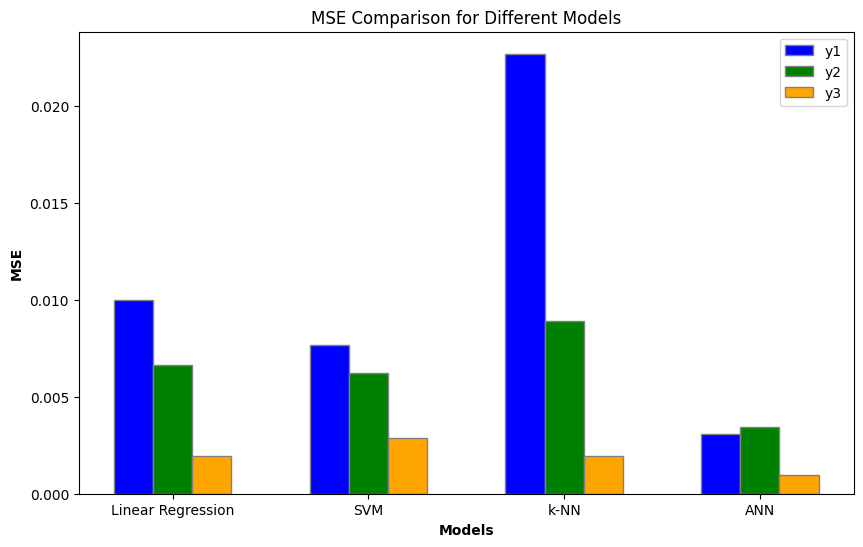

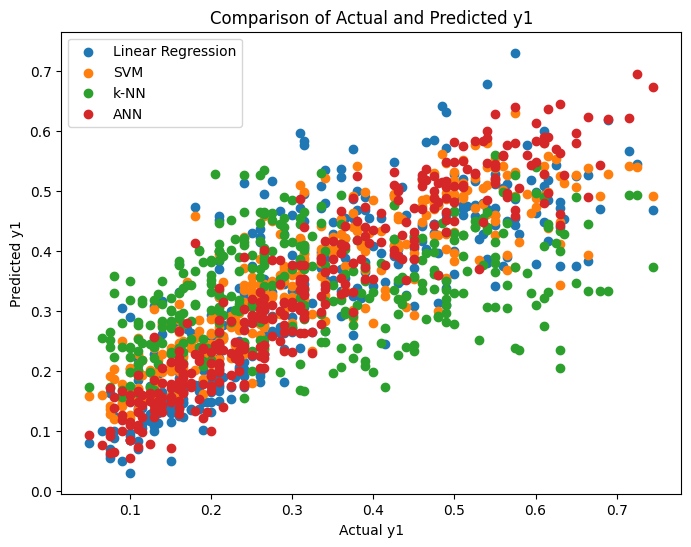

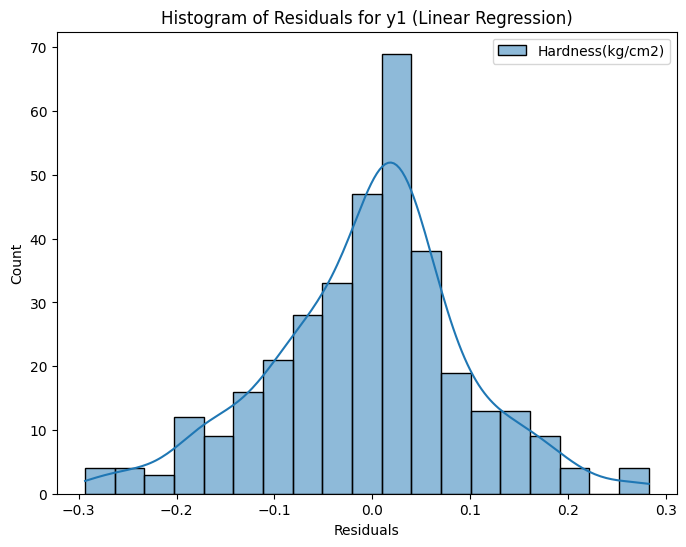

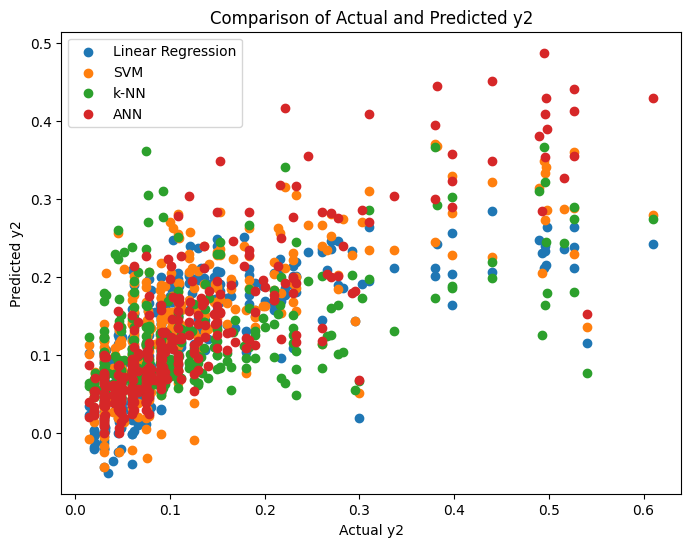

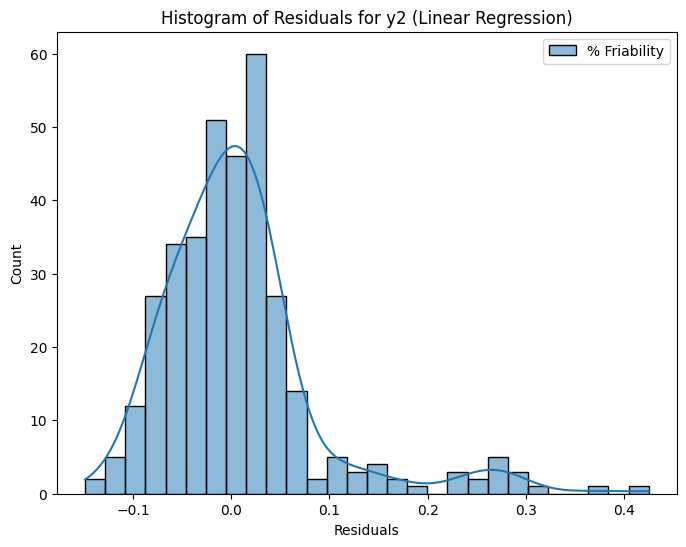

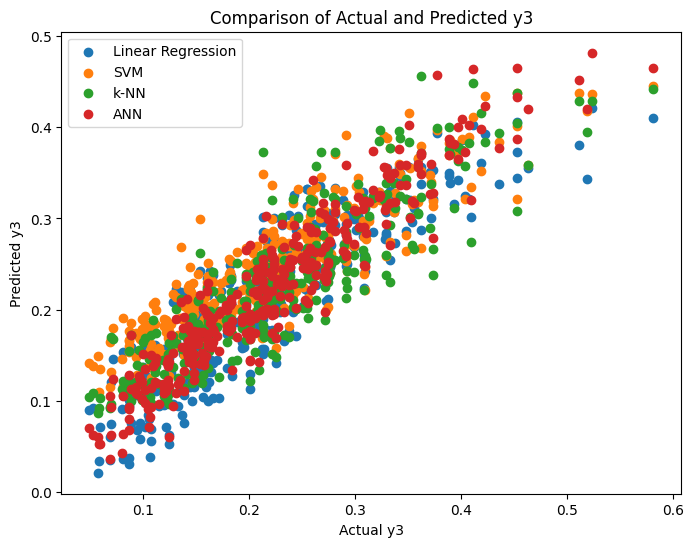

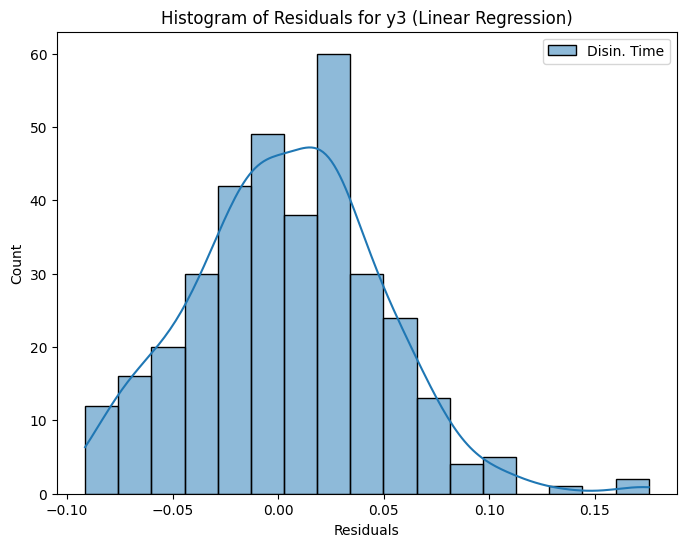

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming you have already defined y1_test, y2_test, y3_test, y1_pred_linear, y2_pred_linear, y3_pred_linear,
# y1_pred_svm, y2_pred_svm, y3_pred_svm, y1_pred_knn, y2_pred_knn, y3_pred_knn, y1_pred_ann, y2_pred_ann, y3_pred_ann

# Evaluate Linear Regression model for y1
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)
print("Linear Regression MSE for y1:", linear_mse_y1)

# Evaluate Linear Regression model for y2
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)
print("Linear Regression MSE for y2:", linear_mse_y2)

# Evaluate Linear Regression model for y3
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)
print("Linear Regression MSE for y3:", linear_mse_y3)

# Evaluate Support Vector Machine (SVM) model for y1
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)
print("SVM MSE for y1:", svm_mse_y1)

# Evaluate Support Vector Machine (SVM) model for y2
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)
print("SVM MSE for y2:", svm_mse_y2)

# Evaluate Support Vector Machine (SVM) model for y3
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)
print("SVM MSE for y3:", svm_mse_y3)

# Evaluate k-Nearest Neighbors (k-NN) model for y1
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)
print("k-NN MSE for y1:", knn_mse_y1)

# Evaluate k-Nearest Neighbors (k-NN) model for y2
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)
print("k-NN MSE for y2:", knn_mse_y2)

# Evaluate k-Nearest Neighbors (k-NN) model for y3
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)
print("k-NN MSE for y3:", knn_mse_y3)

# Evaluate Artificial Neural Network (ANN) model for y1
ann_mse_y1 = mean_squared_error(y1_test, y1_pred_ann)
print("ANN MSE for y1:", ann_mse_y1)

# Evaluate Artificial Neural Network (ANN) model for y2
ann_mse_y2 = mean_squared_error(y2_test, y2_pred_ann)
print("ANN MSE for y2:", ann_mse_y2)

# Evaluate Artificial Neural Network (ANN) model for y3
ann_mse_y3 = mean_squared_error(y3_test, y3_pred_ann)
print("ANN MSE for y3:", ann_mse_y3)

# Create a bar plot of MSE values for each model
models = ['Linear Regression', 'SVM', 'k-NN', 'ANN']
mse_values_y1 = [linear_mse_y1, svm_mse_y1, knn_mse_y1, ann_mse_y1]
mse_values_y2 = [linear_mse_y2, svm_mse_y2, knn_mse_y2, ann_mse_y2]
mse_values_y3 = [linear_mse_y3, svm_mse_y3, knn_mse_y3, ann_mse_y3]

# Set width of bar
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create grouped bar plot for MSE values for each model for y1, y2, and y3
plt.figure(figsize=(10, 6))
plt.bar(r1, mse_values_y1, color='b', width=bar_width, edgecolor='grey', label='y1')
plt.bar(r2, mse_values_y2, color='g', width=bar_width, edgecolor='grey', label='y2')
plt.bar(r3, mse_values_y3, color='orange', width=bar_width, edgecolor='grey', label='y3')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add ylabel
plt.ylabel('MSE', fontweight='bold')

# Add title
plt.title('MSE Comparison for Different Models')
plt.legend()
plt.savefig('MSE_Comparison.tiff', dpi=600, format='tiff')
plt.show()

# Create a scatter plot to compare predicted and actual values for y1
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y1_pred_linear, label='Linear Regression')
plt.scatter(y1_test, y1_pred_svm, label='SVM')
plt.scatter(y1_test, y1_pred_knn, label='k-NN')
plt.scatter(y1_test, y1_pred_ann, label='ANN')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.title('Comparison of Actual and Predicted y1')
plt.legend()
plt.savefig('Actual_vs_Predicted_y1.tiff', dpi=600, format='tiff')
plt.show()

# Create a histogram of residuals for y1
residuals_y1 = y1_test - y1_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y1, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y1 (Linear Regression)')
plt.savefig('Residuals_y1_Histogram.tiff', dpi=600, format='tiff')
plt.show()

# Create a scatter plot to compare predicted and actual values for y2
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y2_pred_linear, label='Linear Regression')
plt.scatter(y2_test, y2_pred_svm, label='SVM')
plt.scatter(y2_test, y2_pred_knn, label='k-NN')
plt.scatter(y2_test, y2_pred_ann, label='ANN')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.title('Comparison of Actual and Predicted y2')
plt.legend()
plt.savefig('Actual_vs_Predicted_y2.tiff', dpi=600, format='tiff')
plt.show()

# Create a histogram of residuals for y2
residuals_y2 = y2_test - y2_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y2, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y2 (Linear Regression)')
plt.savefig('Residuals_y2_Histogram.tiff', dpi=600, format='tiff')
plt.show()

# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3_test, y3_pred_linear, label='Linear Regression')
plt.scatter(y3_test, y3_pred_svm, label='SVM')
plt.scatter(y3_test, y3_pred_knn, label='k-NN')
plt.scatter(y3_test, y3_pred_ann, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.savefig('Actual_vs_Predicted_y3.tiff', dpi=600, format='tiff')
plt.show()

# Create a histogram of residuals for y3
residuals_y3 = y3_test - y3_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y3, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y3 (Linear Regression)')
plt.savefig('Residuals_y3_Histogram.tiff', dpi=600, format='tiff')
plt.show()


27/27 [==============================] - 0s 3ms/step


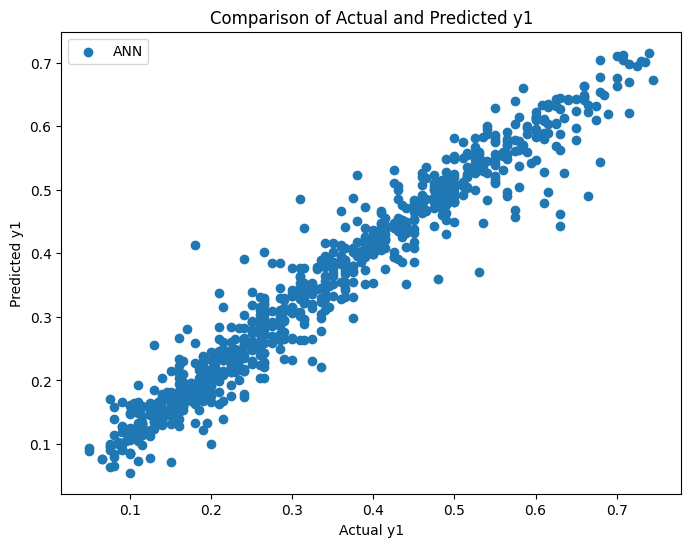

27/27 [==============================] - 0s 3ms/step


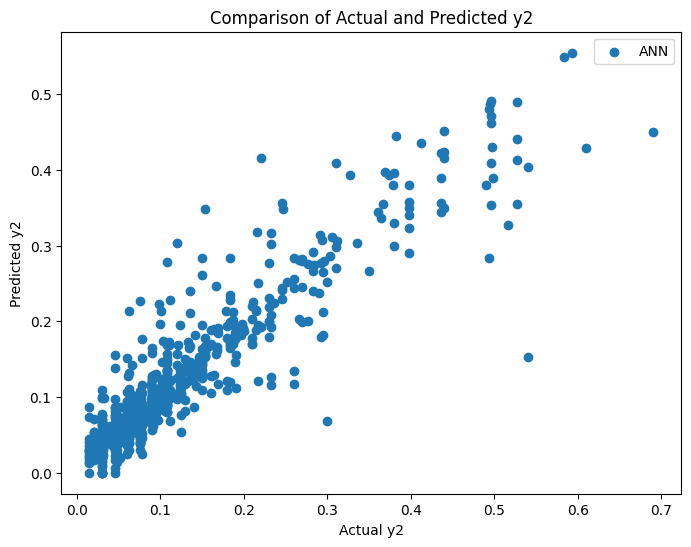

27/27 [==============================] - 0s 3ms/step


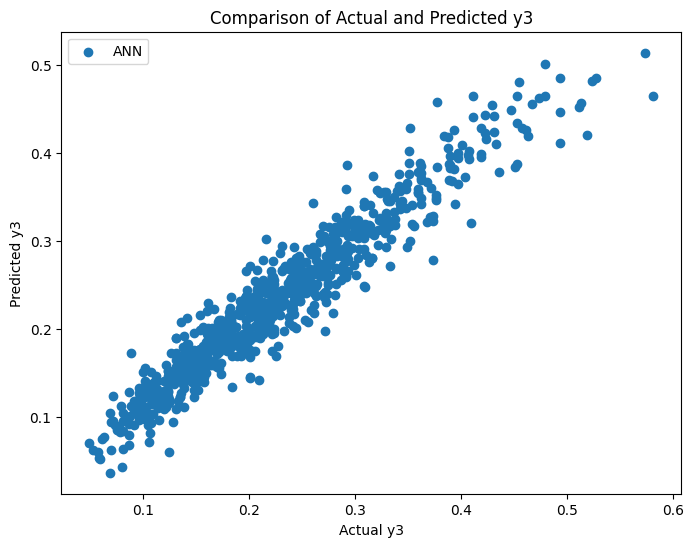

In [5]:
y1_pred_ann_all = ann_y1.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y1, y1_pred_ann_all, label='ANN')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.title('Comparison of Actual and Predicted y1')
plt.legend()
plt.savefig('Actual_vs_Predicted_y1_all_Data.tiff', dpi=600, format='tiff')
plt.show()


y2_pred_ann_all = ann_y2.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y2, y2_pred_ann_all, label='ANN')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.title('Comparison of Actual and Predicted y2')
plt.legend()
plt.savefig('Actual_vs_Predicted_y2_all_Data.tiff', dpi=600, format='tiff')
plt.show()

y3_pred_ann_all = ann_y3.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3, y3_pred_ann_all, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.savefig('Actual_vs_Predicted_y3_all_Data.tiff', dpi=600, format='tiff')
plt.show()

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming you have already defined y1_test, y2_test, y3_test, y1_pred_linear, y2_pred_linear, y3_pred_linear,
# y1_pred_svm, y2_pred_svm, y3_pred_svm, y1_pred_knn, y2_pred_knn, y3_pred_knn, y1_pred_ann, y2_pred_ann, y3_pred_ann

# Evaluate Linear Regression model for y1
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)
print("Linear Regression MSE for y1:", linear_mse_y1)

# Evaluate Linear Regression model for y2
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)
print("Linear Regression MSE for y2:", linear_mse_y2)

# Evaluate Linear Regression model for y3
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)
print("Linear Regression MSE for y3:", linear_mse_y3)

# Evaluate Support Vector Machine (SVM) model for y1
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)
print("SVM MSE for y1:", svm_mse_y1)

# Evaluate Support Vector Machine (SVM) model for y2
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)
print("SVM MSE for y2:", svm_mse_y2)

# Evaluate Support Vector Machine (SVM) model for y3
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)
print("SVM MSE for y3:", svm_mse_y3)

# Evaluate k-Nearest Neighbors (k-NN) model for y1
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)
print("k-NN MSE for y1:", knn_mse_y1)

# Evaluate k-Nearest Neighbors (k-NN) model for y2
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)
print("k-NN MSE for y2:", knn_mse_y2)

# Evaluate k-Nearest Neighbors (k-NN) model for y3
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)
print("k-NN MSE for y3:", knn_mse_y3)

# Evaluate Artificial Neural Network (ANN) model for y1
ann_mse_y1 = mean_squared_error(y1_test, y1_pred_ann)
print("ANN MSE for y1:", ann_mse_y1)

# Evaluate Artificial Neural Network (ANN) model for y2
ann_mse_y2 = mean_squared_error(y2_test, y2_pred_ann)
print("ANN MSE for y2:", ann_mse_y2)

# Evaluate Artificial Neural Network (ANN) model for y3
ann_mse_y3 = mean_squared_error(y3_test, y3_pred_ann)
print("ANN MSE for y3:", ann_mse_y3)

# Function to create and save scatter plots
def create_and_save_scatter_plot(actual, predicted, model_name, y_label, file_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, predicted)
    plt.xlabel('Actual ' + y_label)
    plt.ylabel('Predicted ' + y_label)
    plt.title(f'Actual vs Predicted {y_label} - {model_name}')
    plt.savefig(file_name, dpi=600, format='tiff')
    plt.close()

# Create scatter plots for y1
create_and_save_scatter_plot(y1_test, y1_pred_linear, 'Linear Regression', 'y1', 'Actual_vs_Predicted_y1_LinearRegression.tiff')
create_and_save_scatter_plot(y1_test, y1_pred_svm, 'SVM', 'y1', 'Actual_vs_Predicted_y1_SVM.tiff')
create_and_save_scatter_plot(y1_test, y1_pred_knn, 'k-NN', 'y1', 'Actual_vs_Predicted_y1_kNN.tiff')
create_and_save_scatter_plot(y1_test, y1_pred_ann, 'ANN', 'y1', 'Actual_vs_Predicted_y1_ANN.tiff')

# Create scatter plots for y2
create_and_save_scatter_plot(y2_test, y2_pred_linear, 'Linear Regression', 'y2', 'Actual_vs_Predicted_y2_LinearRegression.tiff')
create_and_save_scatter_plot(y2_test, y2_pred_svm, 'SVM', 'y2', 'Actual_vs_Predicted_y2_SVM.tiff')
create_and_save_scatter_plot(y2_test, y2_pred_knn, 'k-NN', 'y2', 'Actual_vs_Predicted_y2_kNN.tiff')
create_and_save_scatter_plot(y2_test, y2_pred_ann, 'ANN', 'y2', 'Actual_vs_Predicted_y2_ANN.tiff')

# Create scatter plots for y3
create_and_save_scatter_plot(y3_test, y3_pred_linear, 'Linear Regression', 'y3', 'Actual_vs_Predicted_y3_LinearRegression.tiff')
create_and_save_scatter_plot(y3_test, y3_pred_svm, 'SVM', 'y3', 'Actual_vs_Predicted_y3_SVM.tiff')
create_and_save_scatter_plot(y3_test, y3_pred_knn, 'k-NN', 'y3', 'Actual_vs_Predicted_y3_kNN.tiff')
create_and_save_scatter_plot(y3_test, y3_pred_ann, 'ANN', 'y3', 'Actual_vs_Predicted_y3_ANN.tiff')


Linear Regression MSE for y1: 0.009980344207195506
Linear Regression MSE for y2: 0.006666140258802583
Linear Regression MSE for y3: 0.001963464354305471
SVM MSE for y1: 0.007691508180823398
SVM MSE for y2: 0.006230777121101898
SVM MSE for y3: 0.002854692112206702
k-NN MSE for y1: 0.022715854104046244
k-NN MSE for y2: 0.008936444855491329
k-NN MSE for y3: 0.0019690861271676303
ANN MSE for y1: 0.0030869861331554657
ANN MSE for y2: 0.003457173748406288
ANN MSE for y3: 0.000965669325999876


In [7]:
from sklearn.metrics import r2_score

r2_y1_ann_all = r2_score(y1, y1_pred_ann_all)
r2_y2_ann_all = r2_score(y2, y2_pred_ann_all)
r2_y3_ann_all = r2_score(y3, y3_pred_ann_all)
print('R_Square_y1 =', r2_y1_ann_all)
print('R_Square_y2 =', r2_y2_ann_all)
print('R_Square_y3 =', r2_y3_ann_all)

r2_y1_linear_all = r2_score(y1, y1_pred_linear_all)
r2_y2_ann_all = r2_score(y2, y2_pred_ann_all)
r2_y3_ann_all = r2_score(y3, y3_pred_ann_all)

R_Square_y1 = 0.9437661173867556
R_Square_y2 = 0.8492821393575885
R_Square_y3 = 0.9203309340515582


NameError: name 'y1_pred_linear_all' is not defined

In [8]:
from sklearn.metrics import r2_score

# Calculate R-squared for Linear Regression model
linear_r2_y1 = r2_score(y1_test, y1_pred_linear)
linear_r2_y2 = r2_score(y2_test, y2_pred_linear)
linear_r2_y3 = r2_score(y3_test, y3_pred_linear)


print("Linear Regression R-squared for y1:", linear_r2_y1)
print("Linear Regression R-squared for y2:", linear_r2_y2)
print("Linear Regression R-squared for y3:", linear_r2_y3)

# Calculate R-squared for Support Vector Machine (SVM) model
svm_r2_y1 = r2_score(y1_test, y1_pred_svm)
svm_r2_y2 = r2_score(y2_test, y2_pred_svm)
svm_r2_y3 = r2_score(y3_test, y3_pred_svm)

print("SVM R-squared for y1:", svm_r2_y1)
print("SVM R-squared for y2:", svm_r2_y2)
print("SVM R-squared for y3:", svm_r2_y3)

# Calculate R-squared for k-Nearest Neighbors (k-NN) model
knn_r2_y1 = r2_score(y1_test, y1_pred_knn)
knn_r2_y2 = r2_score(y2_test, y2_pred_knn)
knn_r2_y3 = r2_score(y3_test, y3_pred_knn)

print("k-NN R-squared for y1:", knn_r2_y1)
print("k-NN R-squared for y2:", knn_r2_y2)
print("k-NN R-squared for y3:", knn_r2_y3)

# Calculate R-squared for Artificial Neural Network (ANN) model
ann_r2_y1 = r2_score(y1_test, y1_pred_ann)
ann_r2_y2 = r2_score(y2_test, y2_pred_ann)
ann_r2_y3 = r2_score(y3_test, y3_pred_ann)

print("ANN R-squared for y1:", ann_r2_y1)
print("ANN R-squared for y2:", ann_r2_y2)
print("ANN R-squared for y3:", ann_r2_y3)


Linear Regression R-squared for y1: 0.6254060143343083
Linear Regression R-squared for y2: 0.46176272674115415
Linear Regression R-squared for y3: 0.7841381534486158
SVM R-squared for y1: 0.7113132928664261
SVM R-squared for y2: 0.49691480260754517
SVM R-squared for y3: 0.6861572203613635
k-NN R-squared for y1: 0.14740191821238302
k-NN R-squared for y2: 0.27845386911920667
k-NN R-squared for y3: 0.7835200998189398
ANN R-squared for y1: 0.8841356154350143
ANN R-squared for y2: 0.7208609931261019
ANN R-squared for y3: 0.893835014925902


In [9]:
from sklearn.metrics import r2_score

# Predict using the full dataset
y1_pred_linear_full = linear_reg_y1.predict(X_encoded)
y2_pred_linear_full = linear_reg_y2.predict(X_encoded)
y3_pred_linear_full = linear_reg_y3.predict(X_encoded)

y1_pred_svm_full = svm_y1.predict(X_encoded)
y2_pred_svm_full = svm_y2.predict(X_encoded)
y3_pred_svm_full = svm_y3.predict(X_encoded)

y1_pred_knn_full = knn_y1.predict(X_encoded)
y2_pred_knn_full = knn_y2.predict(X_encoded)
y3_pred_knn_full = knn_y3.predict(X_encoded)

y1_pred_ann_full = ann_y1.predict(X_encoded).ravel()
y2_pred_ann_full = ann_y2.predict(X_encoded).ravel()
y3_pred_ann_full = ann_y3.predict(X_encoded).ravel()

# Calculate R-squared for Linear Regression model
linear_r2_y1 = r2_score(y1, y1_pred_linear_full)
linear_r2_y2 = r2_score(y2, y2_pred_linear_full)
linear_r2_y3 = r2_score(y3, y3_pred_linear_full)

print("Linear Regression R-squared for y1:", linear_r2_y1)
print("Linear Regression R-squared for y2:", linear_r2_y2)
print("Linear Regression R-squared for y3:", linear_r2_y3)

# Calculate R-squared for Support Vector Machine (SVM) model
svm_r2_y1 = r2_score(y1, y1_pred_svm_full)
svm_r2_y2 = r2_score(y2, y2_pred_svm_full)
svm_r2_y3 = r2_score(y3, y3_pred_svm_full)

print("SVM R-squared for y1:", svm_r2_y1)
print("SVM R-squared for y2:", svm_r2_y2)
print("SVM R-squared for y3:", svm_r2_y3)

# Calculate R-squared for k-Nearest Neighbors (k-NN) model
knn_r2_y1 = r2_score(y1, y1_pred_knn_full)
knn_r2_y2 = r2_score(y2, y2_pred_knn_full)
knn_r2_y3 = r2_score(y3, y3_pred_knn_full)

print("k-NN R-squared for y1:", knn_r2_y1)
print("k-NN R-squared for y2:", knn_r2_y2)
print("k-NN R-squared for y3:", knn_r2_y3)

# Calculate R-squared for Artificial Neural Network (ANN) model
ann_r2_y1 = r2_score(y1, y1_pred_ann_full)
ann_r2_y2 = r2_score(y2, y2_pred_ann_full)
ann_r2_y3 = r2_score(y3, y3_pred_ann_full)

print("ANN R-squared for y1:", ann_r2_y1)
print("ANN R-squared for y2:", ann_r2_y2)
print("ANN R-squared for y3:", ann_r2_y3)


27/27 [==============================] - 0s 5ms/step
Linear Regression R-squared for y1: 0.6525215870565831
Linear Regression R-squared for y2: 0.45872225856798365
Linear Regression R-squared for y3: 0.7743105729392349
SVM R-squared for y1: 0.7412777990823616
SVM R-squared for y2: 0.5329994644320185
SVM R-squared for y3: 0.668085134708364
k-NN R-squared for y1: 0.31467720645126707
k-NN R-squared for y2: 0.4030875712184484
k-NN R-squared for y3: 0.821157752136113
ANN R-squared for y1: 0.9437661173867556
ANN R-squared for y2: 0.8492821393575885
ANN R-squared for y3: 0.9203309340515582


**FIND IMPORTANCE OF INDEPENDENT FACTORS**

Feature Importances for y1:


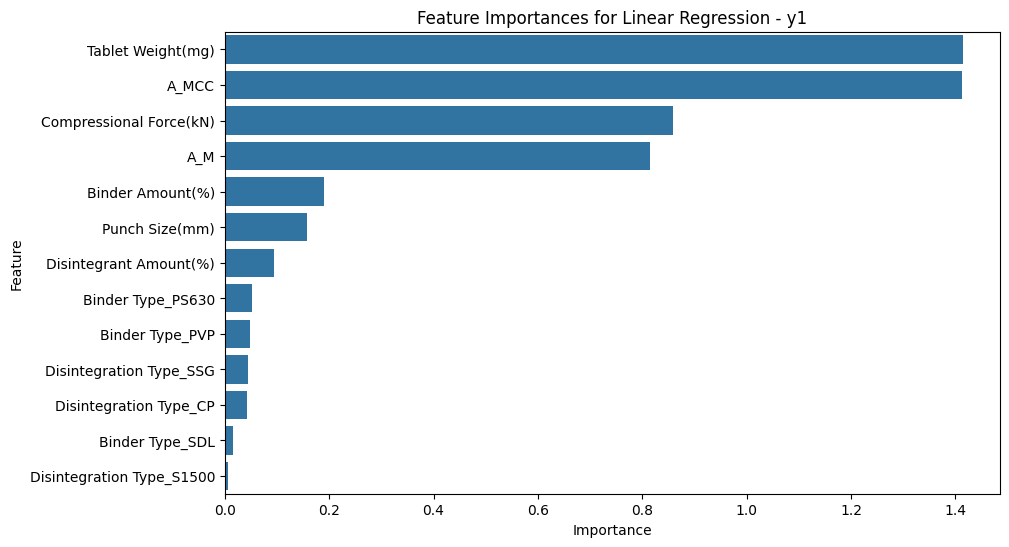

Feature importances are not available for Support Vector Machine.


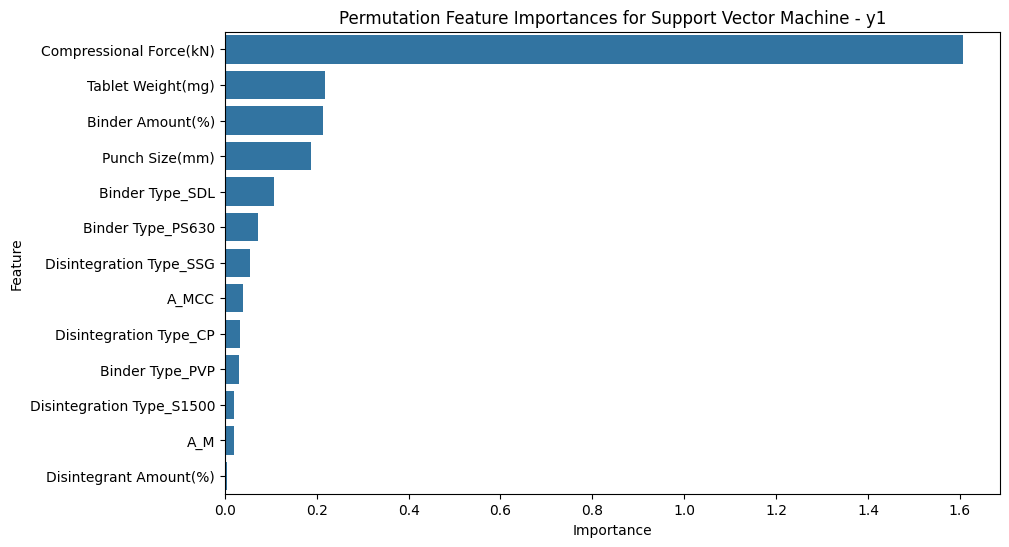

Feature importances are not available for k-Nearest Neighbors.


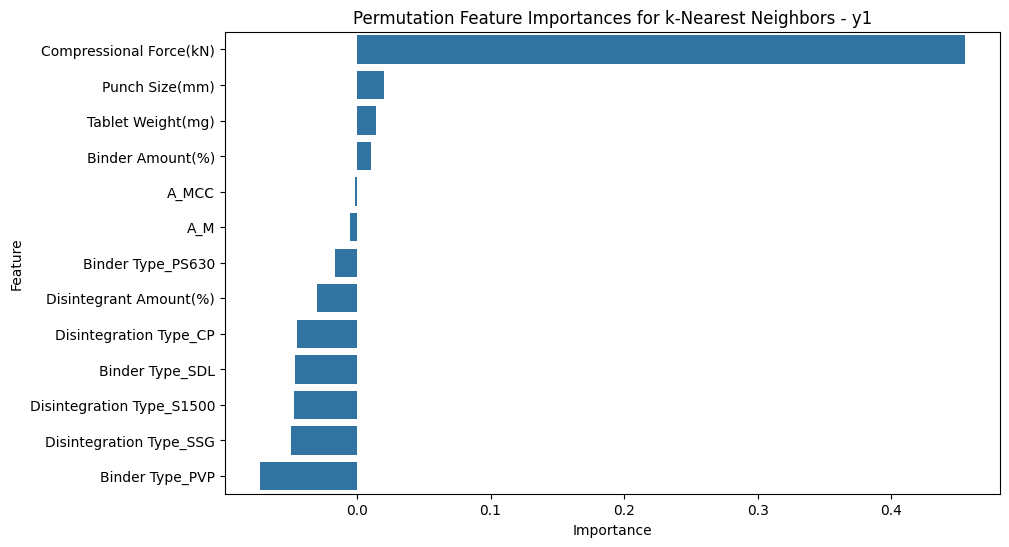

Feature importances are not available for Artificial Neural Network.


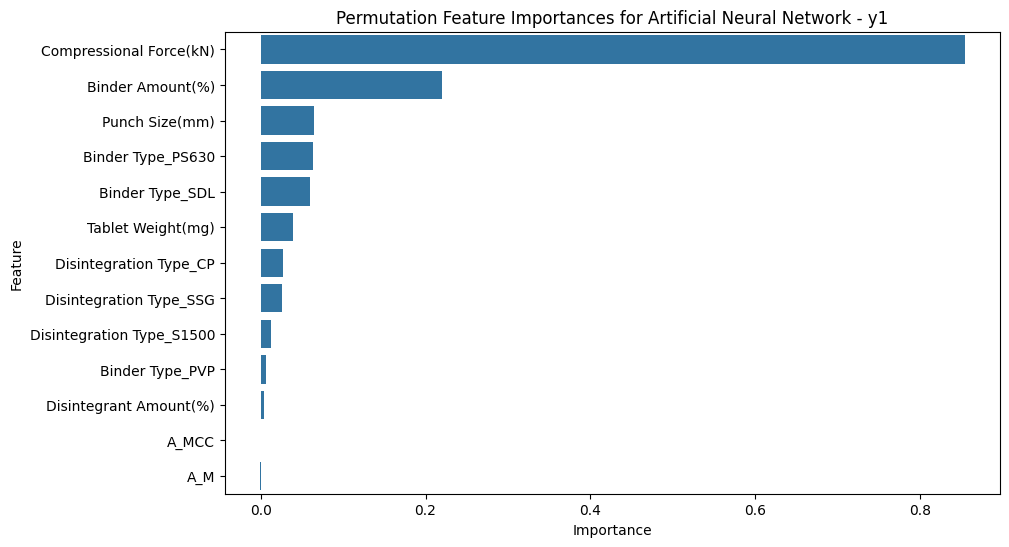

Feature Importances for y2:


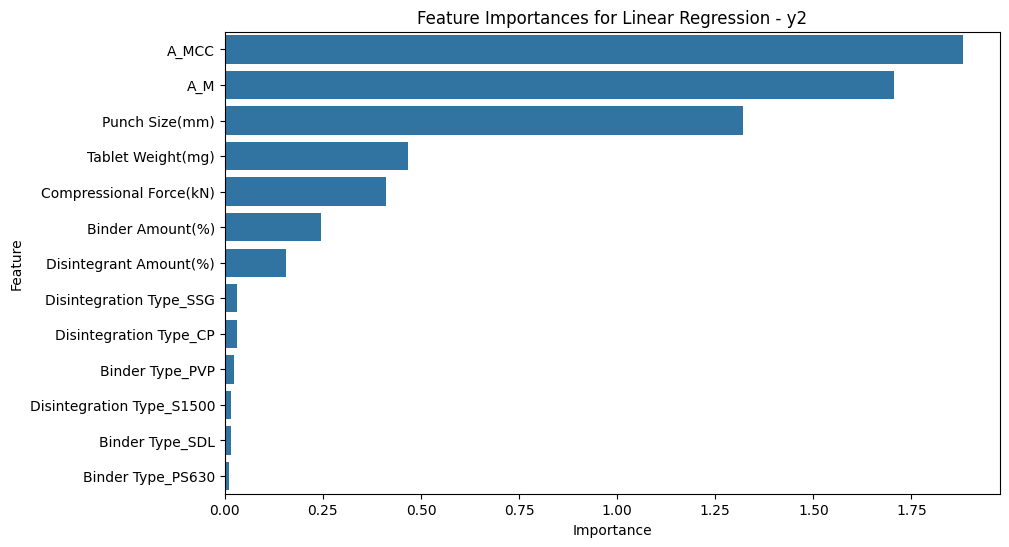

Feature importances are not available for Support Vector Machine.


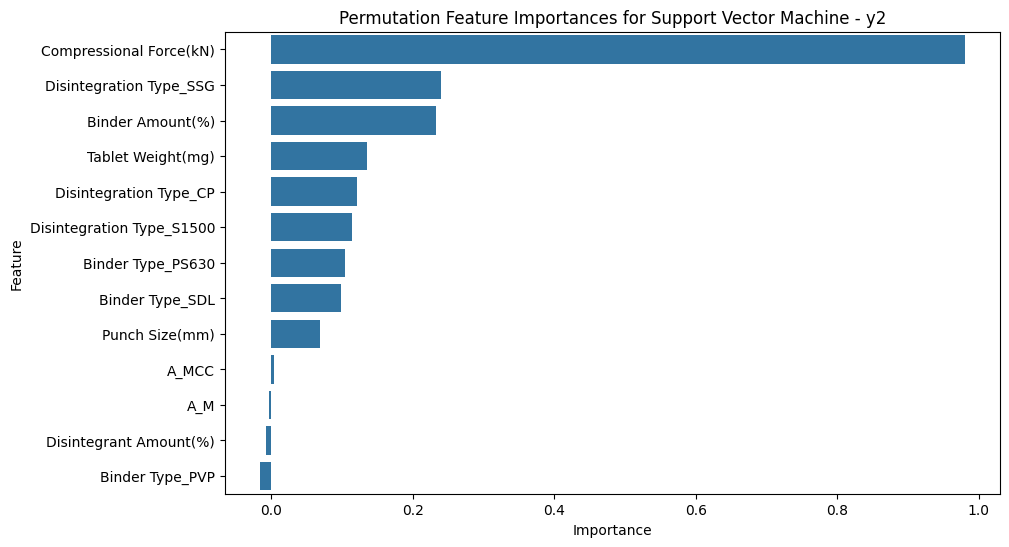

Feature importances are not available for k-Nearest Neighbors.


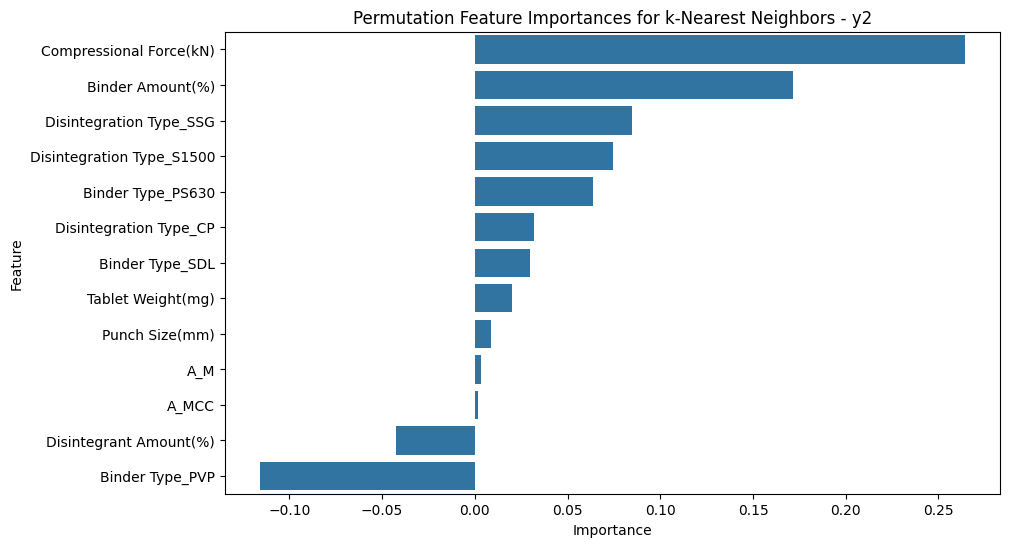

Feature importances are not available for Artificial Neural Network.


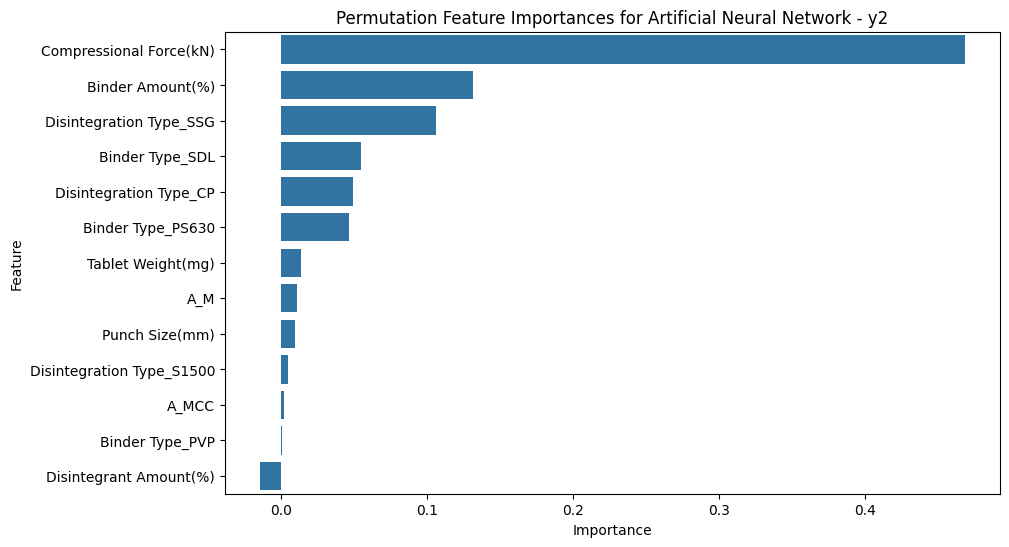

Feature Importances for y3:


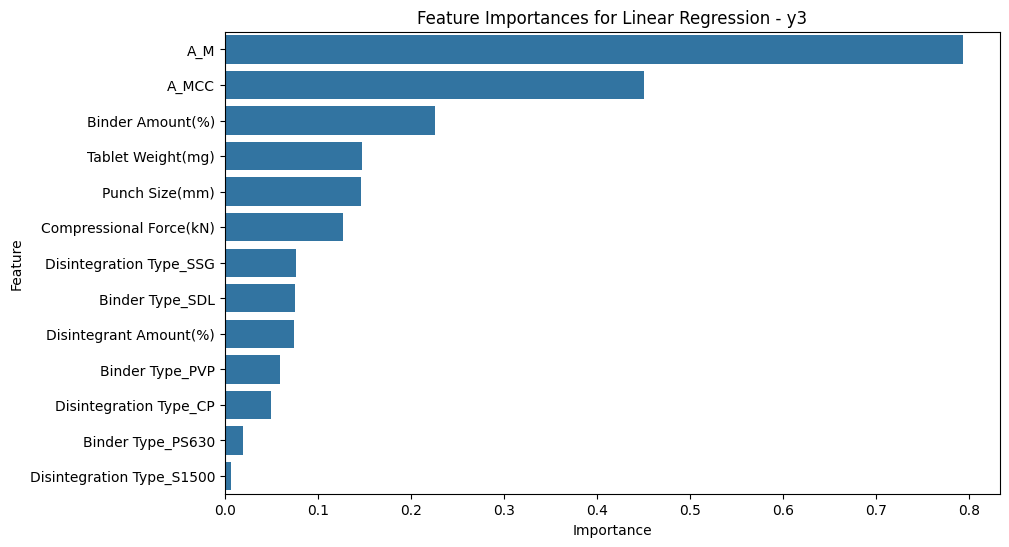

Feature importances are not available for Support Vector Machine.


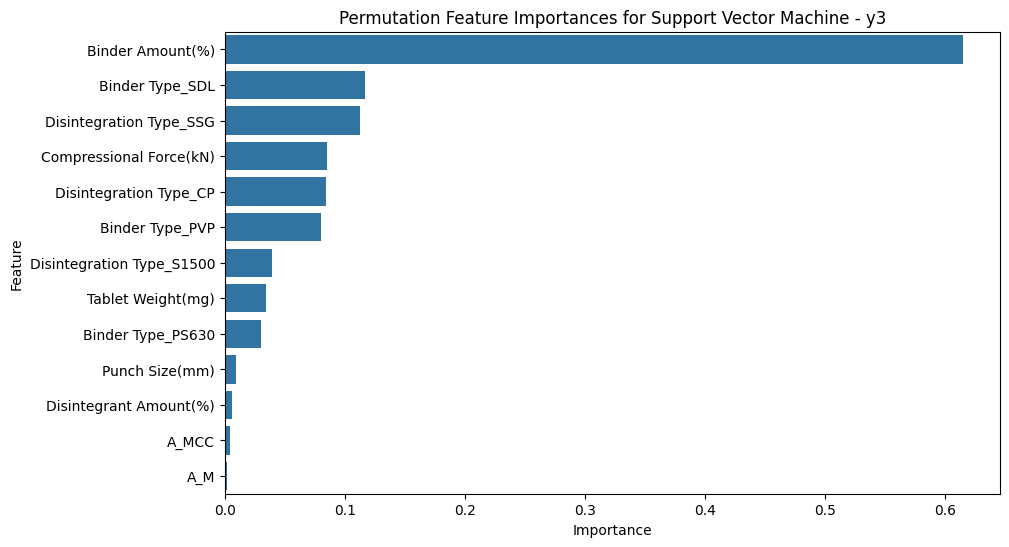

Feature importances are not available for k-Nearest Neighbors.


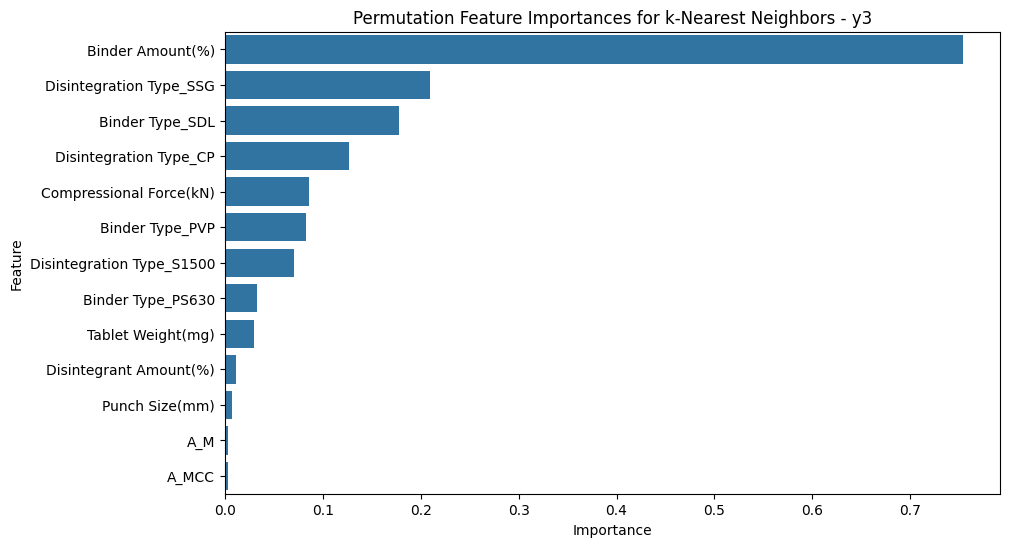

Feature importances are not available for Artificial Neural Network.


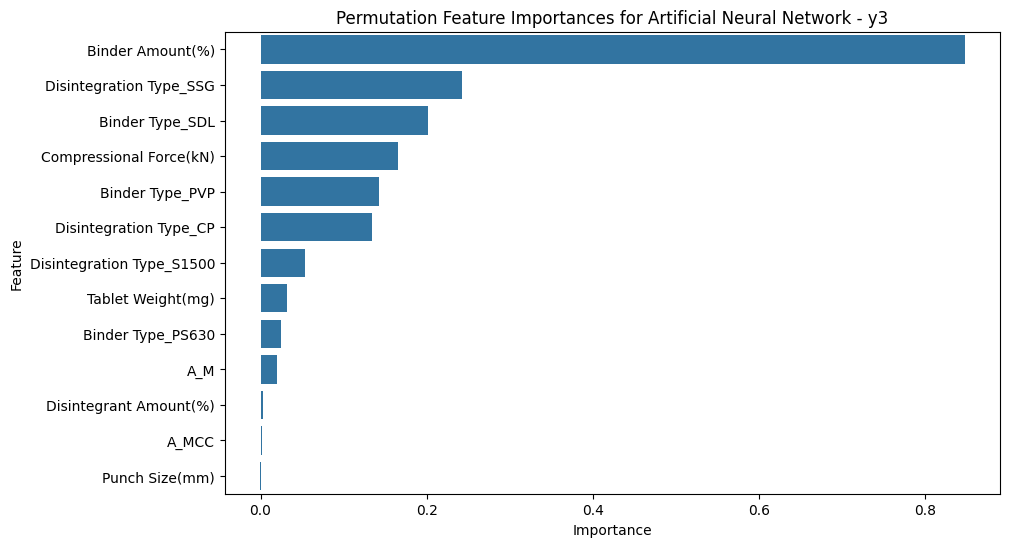

In [21]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance

# Function to calculate and visualize feature importances
def calculate_and_save_feature_importances(model, model_name, X_train, X_test, y_train, y_test, target_name):
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate feature importances for Linear Regression model
    if isinstance(model, LinearRegression):
        feature_importances = np.abs(model.coef_).flatten()
    else:
        feature_importances = None

    if feature_importances is not None:
        feature_names = X_train.columns
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        # Visualization of feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title(f'Feature Importances for {model_name} - {target_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.savefig(f'Feature_Importances_{model_name}_{target_name}.tiff', dpi=600, format='tiff')
        plt.show()
    else:
        print(f"Feature importances are not available for {model_name}.")

    # Use permutation importance for models that don't provide feature importances
    if not isinstance(model, LinearRegression):
        perm_importance = permutation_importance(model, X_test, y_test.values.ravel(), n_repeats=10, random_state=42)
        feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': perm_importance.importances_mean})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        # Visualization of permutation feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title(f'Permutation Feature Importances for {model_name} - {target_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.savefig(f'Permutation_Feature_Importances_{model_name}_{target_name}.tiff', dpi=600, format='tiff')
        plt.show()

# Example datasets (replace with actual data loading and preprocessing)
# Assuming X_encoded, y1, y2, y3 are defined and preprocessed
# Split the data
X_train, X_test, y1_train, y1_test = train_test_split(X_encoded, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(X_encoded, y2, test_size=0.2, random_state=42)
_, _, y3_train, y3_test = train_test_split(X_encoded, y3, test_size=0.2, random_state=42)

# Models for y1, y2, and y3
models_y1 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor(max_iter=500)
]

models_y2 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor(max_iter=500)
]

models_y3 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor(max_iter=500)
]

model_names = ['Linear Regression', 'Support Vector Machine', 'k-Nearest Neighbors', 'Artificial Neural Network']

# Loop through all models and visualize feature importances for y1
print("Feature Importances for y1:")
for model, model_name in zip(models_y1, model_names):
    calculate_and_save_feature_importances(model, model_name, X_train, X_test, y1_train, y1_test, 'y1')

# Loop through all models and visualize feature importances for y2
print("Feature Importances for y2:")
for model, model_name in zip(models_y2, model_names):
    calculate_and_save_feature_importances(model, model_name, X_train, X_test, y2_train, y2_test, 'y2')

# Loop through all models and visualize feature importances for y3
print("Feature Importances for y3:")
for model, model_name in zip(models_y3, model_names):
    calculate_and_save_feature_importances(model, model_name, X_train, X_test, y3_train, y3_test, 'y3')


In [ ]:
from google.colab import files

# Replace 'file_path' with the path to the file you want to download
files.download('/content/drive/My Drive/y1.hdf5')
files.download('/content/drive/My Drive/y2.hdf5')
files.download('/content/drive/My Drive/y3.hdf5')